In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn3.csv')
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [3]:


# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Display the encoded dataset
print(X)
print(y)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):
SeniorCitizen       0.045576
TotalCharges        0.044970
InternetService     0.044374
MonthlyCharges      0.041722
PhoneService        0.034432
StreamingMovies     0.033447
tenure              0.030543
DeviceProtection    0.028871
StreamingTV         0.027560
OnlineBackup        0.026019
MultipleLines       0.023080
gender              0.022410
TechSupport         0.018331
PaymentMethod       0.017555
Dependents          0.014144
Partner             0.012053
PaperlessBilling    0.011572
Contract            0.009324
OnlineSecurity      0.008161
dtype: float64


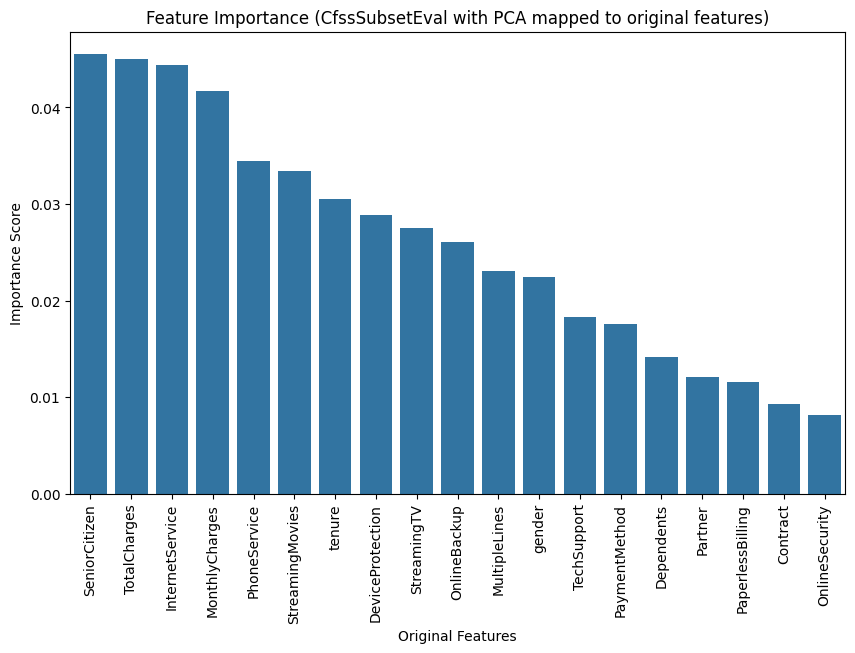


Selected Features (Threshold-Based Selection):
SeniorCitizen       0.045576
TotalCharges        0.044970
InternetService     0.044374
MonthlyCharges      0.041722
PhoneService        0.034432
StreamingMovies     0.033447
tenure              0.030543
DeviceProtection    0.028871
StreamingTV         0.027560
OnlineBackup        0.026019
MultipleLines       0.023080
gender              0.022410
TechSupport         0.018331
PaymentMethod       0.017555
Dependents          0.014144
Partner             0.012053
PaperlessBilling    0.011572
Contract            0.009324
OnlineSecurity      0.008161
dtype: float64

Selected Top-10 Features:
SeniorCitizen       0.045576
TotalCharges        0.044970
InternetService     0.044374
MonthlyCharges      0.041722
PhoneService        0.034432
StreamingMovies     0.033447
tenure              0.030543
DeviceProtection    0.028871
StreamingTV         0.027560
OnlineBackup        0.026019
dtype: float64

Selected Features (Cumulative Importance up to 80.0%)

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn3.csv')

# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply PCA to retain 95% of the variance
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Evaluate the importance of principal components using mutual information
    mi = mutual_info_classif(X_train_pca, y_train)
    pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]).sort_values(ascending=False)

    # Get the loadings (components)
    loadings = pca.components_

    # Calculate the importance of the original features
    original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
    importance_scores += original_feature_importance

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (CfssSubsetEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


Feature Importance Scores (GainRatioAttributeEval with PCA mapped to original features):
Partner             4.929754
Dependents          4.880930
StreamingTV         1.605719
SeniorCitizen       1.525611
Contract            1.512168
PhoneService        0.766908
TechSupport         0.738691
StreamingMovies     0.709238
MultipleLines       0.529390
OnlineSecurity      0.520577
DeviceProtection    0.420415
MonthlyCharges      0.417680
TotalCharges        0.328906
gender              0.296797
OnlineBackup        0.267719
PaymentMethod       0.267011
PaperlessBilling    0.255030
InternetService     0.130912
tenure              0.023824
dtype: float64


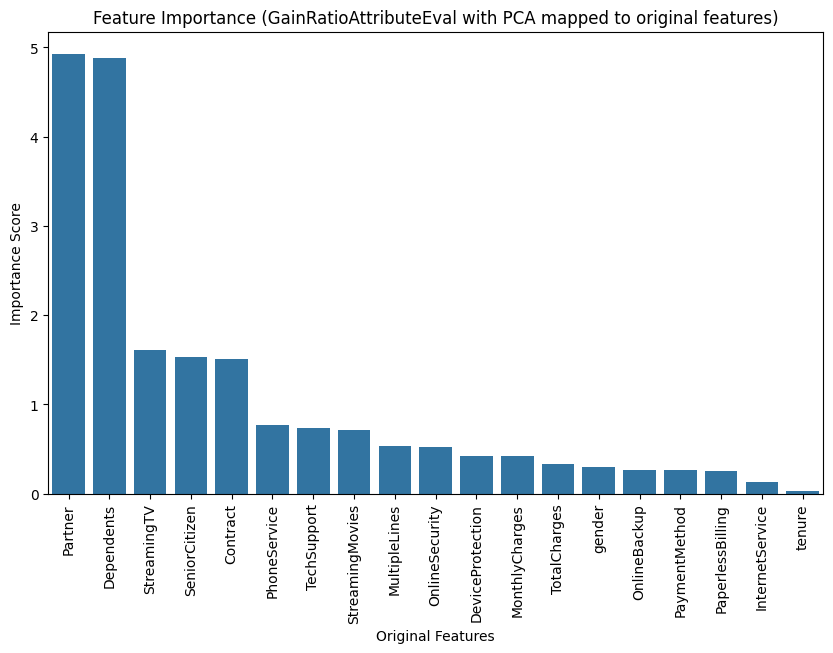


Cross-Validation Scores:
[0.83426206 0.83855047 0.80192849 0.80825012 0.82566276]

Selected Features (Threshold-Based Selection):
Partner             4.929754
Dependents          4.880930
StreamingTV         1.605719
SeniorCitizen       1.525611
Contract            1.512168
PhoneService        0.766908
TechSupport         0.738691
StreamingMovies     0.709238
MultipleLines       0.529390
OnlineSecurity      0.520577
DeviceProtection    0.420415
MonthlyCharges      0.417680
TotalCharges        0.328906
gender              0.296797
OnlineBackup        0.267719
PaymentMethod       0.267011
PaperlessBilling    0.255030
InternetService     0.130912
tenure              0.023824
dtype: float64

Selected Top-10 Features:
Partner            4.929754
Dependents         4.880930
StreamingTV        1.605719
SeniorCitizen      1.525611
Contract           1.512168
PhoneService       0.766908
TechSupport        0.738691
StreamingMovies    0.709238
MultipleLines      0.529390
OnlineSecurity     0.520

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn3.csv')

# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Calculate Information Gain (mutual information) for principal components
ig = mutual_info_classif(X_pca, y)

# Calculate Intrinsic Value for each principal component
X_pca_abs = np.abs(X_pca)
intrinsic_value = -np.sum(X_pca_abs * np.log2(X_pca_abs + 1e-9), axis=0) / len(X_pca)

# Compute Gain Ratio for each principal component
gain_ratio = ig / (intrinsic_value + 1e-9)  # Adding a small constant to avoid division by zero
pc_importance = pd.Series(gain_ratio, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features
original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
original_feature_importance_series = pd.Series(original_feature_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (GainRatioAttributeEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (GainRatioAttributeEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
model = RandomForestClassifier()  # You can use any classifier for cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')  # Using ROC AUC as the scoring metric

print("\nCross-Validation Scores:")
print(cv_scores)

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


In [7]:
!pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29255 sha256=002137333bf1e667cf254c9d9f7d661c7c42ad635bda3ee68a4b3b3959842650
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


Feature Importance Scores (ReliefFAttributeEval):
Contract            0.173065
tenure              0.101509
PaymentMethod       0.080704
TotalCharges        0.052798
MultipleLines       0.045904
InternetService     0.042965
gender              0.039628
PaperlessBilling    0.036263
Dependents          0.034957
OnlineSecurity      0.030612
Partner             0.030371
TechSupport         0.028454
MonthlyCharges      0.021419
OnlineBackup        0.019651
StreamingMovies     0.017379
StreamingTV         0.016342
DeviceProtection    0.012736
SeniorCitizen       0.009030
PhoneService        0.007156
dtype: float64


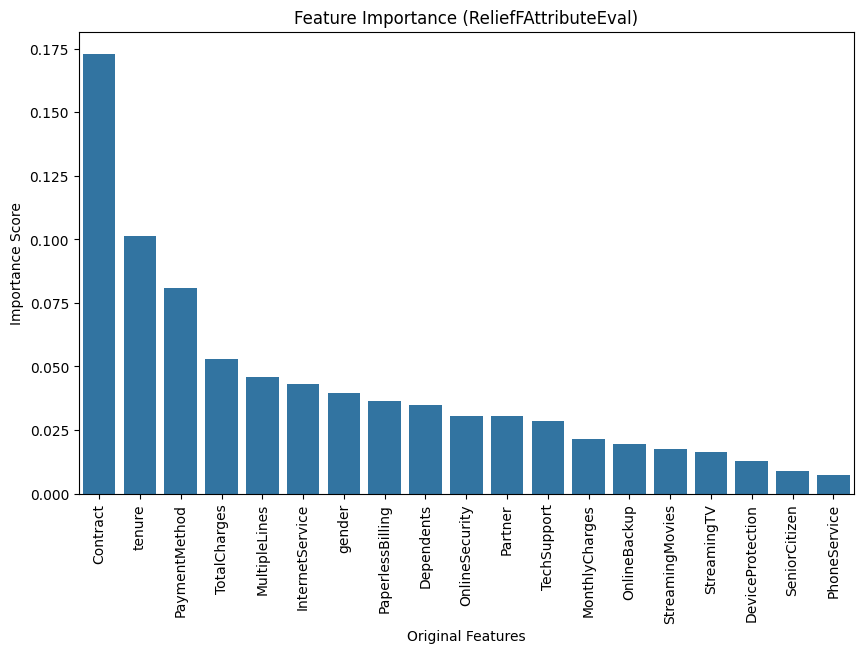


Cross-Validation Scores:
[0.82866775 0.83608076 0.80905474 0.8104467  0.82279761]

Selected Features (Threshold-Based Selection):
Contract            0.173065
tenure              0.101509
PaymentMethod       0.080704
TotalCharges        0.052798
MultipleLines       0.045904
InternetService     0.042965
gender              0.039628
PaperlessBilling    0.036263
Dependents          0.034957
OnlineSecurity      0.030612
Partner             0.030371
TechSupport         0.028454
MonthlyCharges      0.021419
OnlineBackup        0.019651
StreamingMovies     0.017379
StreamingTV         0.016342
DeviceProtection    0.012736
SeniorCitizen       0.009030
PhoneService        0.007156
dtype: float64

Selected Top-10 Features:
Contract            0.173065
tenure              0.101509
PaymentMethod       0.080704
TotalCharges        0.052798
MultipleLines       0.045904
InternetService     0.042965
gender              0.039628
PaperlessBilling    0.036263
Dependents          0.034957
OnlineSecurity 

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from skrebate import ReliefF
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn3.csv')

# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate the importance of original features using ReliefF
relief = ReliefF(n_neighbors=10, n_features_to_select=X.shape[1])
X_relief = relief.fit_transform(X.values, y.values)  # Transform X using ReliefF
feature_importances = relief.feature_importances_

# Print the feature importance scores of the original features
original_feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print("Feature Importance Scores (ReliefFAttributeEval):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (ReliefFAttributeEval)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
model = RandomForestClassifier()  # You can use any classifier for cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')  # Using ROC AUC as the scoring metric

print("\nCross-Validation Scores:")
print(cv_scores)

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


Feature Importance Scores (PCA-IG mapped to original features):
SeniorCitizen       0.070881
MonthlyCharges      0.047449
StreamingMovies     0.042357
InternetService     0.039302
TotalCharges        0.033054
Partner             0.033008
PaperlessBilling    0.026581
MultipleLines       0.025455
PhoneService        0.017056
gender              0.016755
TechSupport         0.016326
OnlineBackup        0.014302
DeviceProtection    0.012746
tenure              0.010611
PaymentMethod       0.006825
OnlineSecurity      0.006248
StreamingTV         0.005969
Contract            0.004052
Dependents          0.003575
dtype: float64


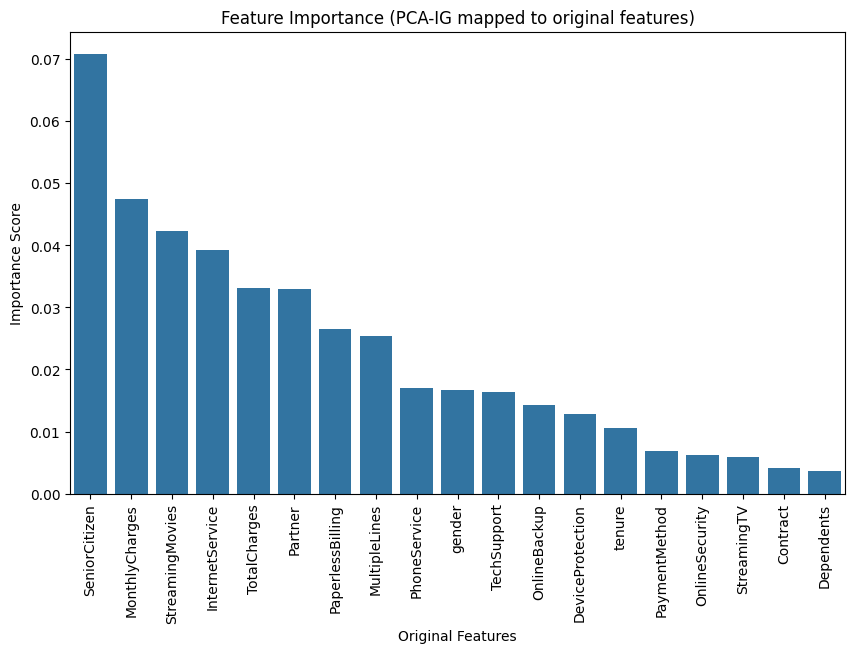


Selected Features (Threshold-Based Selection):
SeniorCitizen       0.070881
MonthlyCharges      0.047449
StreamingMovies     0.042357
InternetService     0.039302
TotalCharges        0.033054
Partner             0.033008
PaperlessBilling    0.026581
MultipleLines       0.025455
PhoneService        0.017056
gender              0.016755
TechSupport         0.016326
OnlineBackup        0.014302
DeviceProtection    0.012746
tenure              0.010611
PaymentMethod       0.006825
OnlineSecurity      0.006248
StreamingTV         0.005969
Contract            0.004052
Dependents          0.003575
dtype: float64

Selected Top-10 Features:
SeniorCitizen       0.070881
MonthlyCharges      0.047449
StreamingMovies     0.042357
InternetService     0.039302
TotalCharges        0.033054
Partner             0.033008
PaperlessBilling    0.026581
MultipleLines       0.025455
PhoneService        0.017056
gender              0.016755
dtype: float64

Selected Features (Cumulative Importance up to 90.0%)

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn3.csv')

# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information
mi = mutual_info_classif(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.002
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.90
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Evaluate cross-validated feature importance for selected features
def evaluate_feature_importance_cv(X, y, cv):
    def cross_val_feature_importance(model, X, y, cv):
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        return np.mean(scores)

    # Example: Select top features based on some selection method (threshold, top_n, cumulative)
    selected_features = selected_features_threshold.index  # Replace with selected features based on method

    # Example: Evaluate feature importance using a classifier (e.g., RandomForestClassifier)
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    feature_importance_scores = {}

    for feature in selected_features:
        X_feature = X[feature].values.reshape(-1, 1)
        score = cross_val_feature_importance(model, X_feature, y, cv)
        feature_importance_scores[feature] = score

    return feature_importance_scores

# Example usage:
feature_importance_scores = evaluate_feature_importance_cv(X, y, cv)
print("\nCross-validated Feature Importance Scores:")
print(feature_importance_scores)
